In [117]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [118]:
df = pd.read_csv("/Users/admin/Desktop/UNI/Y3/BT4012/Project/BT4012_Reviews/Data/Raw/Entity_Count_Flag_dataframe.csv")

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_20520/341387442.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/Desktop/UNI/Y3/BT4012/Project/BT4012_Reviews/Data/Raw/Entity_Count_Flag_dataframe.csv")


In [119]:
df["reviewContent"].head(10)


0    Unlike Next, which we'd eaten at the previous ...
1    Probably one of the best meals I've had ever. ...
2    Service was impeccable. Experience and present...
3    The problem with places like this, given the e...
4    I have no idea how to write my review - dining...
5    Despite the first-world tragedy I endured in a...
6    Overall, was it worth the hype? Yes and more. ...
7    There are already TONS of professional & amate...
8    Your life is a countdown ever since you're bor...
9    Lots of complaints about how difficult it is t...
Name: reviewContent, dtype: object

In [120]:
import pandas as pd
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet data for NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Stop words
stopwords = nltk.corpus.stopwords.words('english')

# Functions for preprocessing
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

def preprocess(text):
    text = remove_punctuation(text)
    text = text.lower()
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# Apply preprocessing
df['preprocessed'] = df['reviewContent'].apply(lambda x: preprocess(x))

print(df[['reviewContent', 'preprocessed']])


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                           reviewContent  \
0      Unlike Next, which we'd eaten at the previous ...   
1      Probably one of the best meals I've had ever. ...   
2      Service was impeccable. Experience and present...   
3      The problem with places like this, given the e...   
4      I have no idea how to write my review - dining...   
...                                                  ...   
26951  It's Taco Bell, with higher prices, but it's T...   
26952  Yellow Rose is a favorite of mine. I'd go ther...   
26953  Not bad. We ate there because the odd wicker s...   
26954  We were surprised to have been eagerly roped i...   
26955  A gorgeous shy young teen asked the owner if s...   

                                            preprocessed  
0      [unlike, next, wed, eaten, previous, night, di...  
1      [probably, one, best, meal, ive, ever, perform...  
2      [service, impeccable, experience, presentation...  
3      [problem, place, like, given, exhorb

### LDA - Topic Modelling 

In [136]:
from gensim.corpora import Dictionary
processed_data = df["preprocessed"]

# create dictionary from preprocessed column in df where every unique token will be assigned a unique ID 
dictionary = Dictionary(df["preprocessed"])

# converts each text into boW -> list of tuples each tuples is (token_id, token_count)
# id mapped by dict, token count is num times appear in document 
corpus = [dictionary.doc2bow(text) for text in processed_data]


In [193]:
from gensim.models import LdaModel

# train model 
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=40, random_state=42)


In [194]:
topics = []
# for each review in corpus, get topic distribution 

for review in corpus:
    # get topic distribution for each review; returns list of tuples each tuple consist of (topic_num, probabilityP)

    topic_distribution = lda_model[review]
    # print(topic_distribution)
    # sort by probability, get the topic number of the highest probability
    # [0][0] gets the topic number of highest probability, then append to topics     
    main_topic = sorted(topic_distribution, key=lambda x: x[1], reverse=True)[0][0]
    topics.append(main_topic)

In [195]:
df['main_topic'] = topics


In [196]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")


Topic: 0 
Words: 0.013*"south" + 0.009*"noon" + 0.008*"like" + 0.008*"water" + 0.007*"one" + 0.007*"u" + 0.006*"would" + 0.006*"food" + 0.006*"came" + 0.006*"server"

Topic: 1 
Words: 0.025*"potato" + 0.024*"fry" + 0.014*"burger" + 0.010*"sauce" + 0.010*"mashed" + 0.010*"pancake" + 0.009*"cheese" + 0.009*"french" + 0.009*"bacon" + 0.009*"sweet"

Topic: 2 
Words: 0.024*"place" + 0.016*"like" + 0.016*"good" + 0.016*"dont" + 0.015*"bar" + 0.014*"get" + 0.012*"ive" + 0.011*"im" + 0.011*"always" + 0.011*"go"

Topic: 3 
Words: 0.081*"sandwich" + 0.032*"lunch" + 0.012*"chip" + 0.012*"soup" + 0.011*"ok" + 0.010*"get" + 0.009*"guacamole" + 0.009*"spicy" + 0.008*"love" + 0.008*"really"

Topic: 4 
Words: 0.015*"meat" + 0.015*"salad" + 0.013*"chicken" + 0.012*"dish" + 0.010*"good" + 0.009*"soup" + 0.008*"dessert" + 0.008*"sauce" + 0.007*"delicious" + 0.007*"meal"

Topic: 5 
Words: 0.028*"bun" + 0.022*"whiskey" + 0.020*"ribeye" + 0.019*"gluten" + 0.015*"medallion" + 0.010*"duck" + 0.007*"raised" + 

In [197]:
df["main_topic"].describe()

count    26956.000000
mean        16.749852
std         10.286571
min          0.000000
25%         10.000000
50%         14.000000
75%         26.000000
max         38.000000
Name: main_topic, dtype: float64

In [189]:
 df["flagged"] = df["flagged"].replace({"N":0, "Y": 1})

### Comparing Topics between Fradulent and Non-Fradulent Class

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_20520/3087426889.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==0]["main_topic"], shade=True, color="green", label="Genuine", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_20520/3087426889.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==1]["main_topic"], shade=True, color="blue", label="Fraudulent", ax=ax)


Text(0.5, 0.98, 'Main Topic vs Fraud Class')

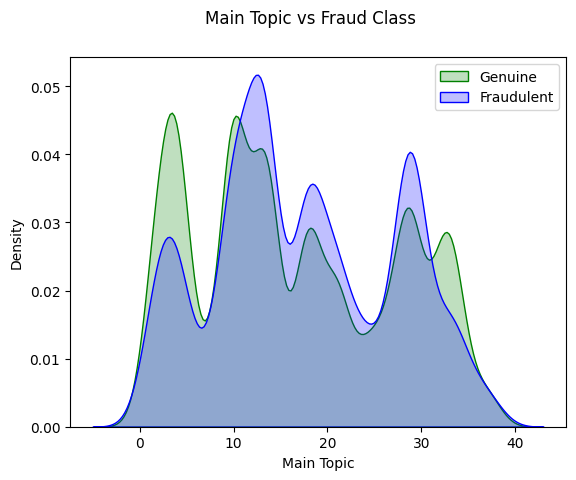

In [198]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(df[df["flagged"]==0]["main_topic"], shade=True, color="green", label="Genuine", ax=ax)

sns.kdeplot(df[df["flagged"]==1]["main_topic"], shade=True, color="blue", label="Fraudulent", ax=ax)
ax.set_xlabel("Main Topic")
ax.set_ylabel("Density")
ax.legend()
fig.suptitle("Main Topic vs Fraud Class")


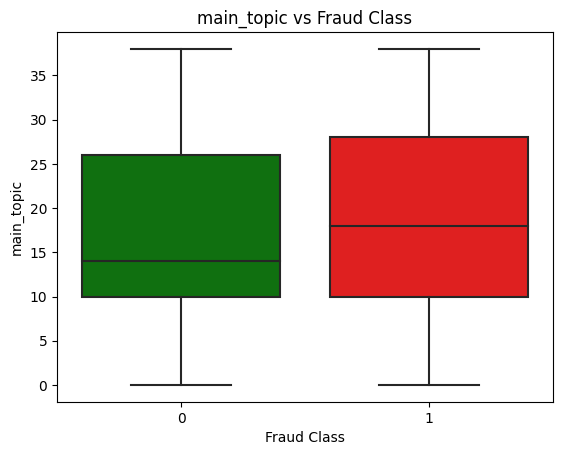

In [199]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the boxplot on the axis object
sns.boxplot(x="flagged", y="main_topic", data=df, palette={1: "red", 0: "green"}, ax=ax)

# Set the title and axis labels
ax.set_title("main_topic vs Fraud Class")
ax.set_ylabel("main_topic")
ax.set_xlabel("Fraud Class")

# Display the plot
plt.show()


In [200]:
description = df.groupby('flagged')['main_topic'].describe()
print(description)


           count       mean        std  min   25%   50%   75%   max
flagged                                                            
0        20752.0  16.552814  10.475505  0.0  10.0  14.0  26.0  38.0
1         6204.0  17.408930   9.599152  0.0  10.0  18.0  28.0  38.0
